In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving service_data.xlsx to service_data.xlsx


In [ ]:
import io

df = pd.read_excel(io.BytesIO(uploaded.get('service_data.xlsx')))

In [ ]:
data = df[['opened_at','priority']]


In [ ]:
data['date'] = pd.DatetimeIndex(data['opened_at']).date

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
data = data[['date','priority']]
data.head(5)

,date,priority
0,2018-11-28,3 - Moderate
1,2018-11-27,4 - Low
2,2018-11-25,4 - Low
3,2018-11-25,3 - Moderate
4,2018-11-25,2 - High


In [ ]:
mod = data.loc[data['priority']=='3 - Moderate'][['date','priority']]
mod = mod.groupby(['date']).agg({"priority":"count"})
mod.columns = ['Moderate']
mod = mod.reset_index()
mod.head()

,date,Moderate
0,2018-01-13,27
1,2018-01-14,39
2,2018-01-15,117
3,2018-01-16,113
4,2018-01-17,110


In [ ]:
crit = data.loc[df['priority']=='1 - Critical'][['date','priority']]
crit = crit.groupby(['date']).agg({"priority":"count"})
crit.columns = ['Critical']
crit = crit.reset_index()
crit.head()

,date,Critical
0,2018-01-19,1
1,2018-01-20,1
2,2018-01-21,1
3,2018-01-31,1
4,2018-02-01,1


In [ ]:
low = data.loc[df['priority']=='4 - Low'][['date','priority']]
low = low.groupby(['date']).agg({"priority":"count"})
low.columns = ['low']
low = low.reset_index()

In [ ]:
High = data.loc[df['priority']=='2 - High'][['date','priority']]
High = High.groupby(['date']).agg({"priority":"count"})
High.columns = ['High']
High = High.reset_index()

In [ ]:
SLA = data.loc[df['priority']=='5 - Scheduled SLA'][['date','priority']]
SLA = SLA.groupby(['date']).agg({"priority":"count"})
SLA.columns = ['Schedule SLA']
SLA = SLA.reset_index()
SLA

,date,Schedule SLA
0,2018-01-14,1
1,2018-01-15,11
2,2018-01-16,4
3,2018-01-17,10
4,2018-01-18,14
...,...,...
280,2018-11-20,26
281,2018-11-21,7
282,2018-11-22,2
283,2018-11-23,6


In [ ]:
df_combine = pd.merge(data,crit,on='date',how='left')
df_combine = pd.merge(df_combine,High,on='date',how='left')
df_combine = pd.merge(df_combine,low,on='date',how='left')
df_combine = pd.merge(df_combine,mod,on='date',how='left')
df_combine = pd.merge(df_combine,SLA,on='date',how='left')

In [ ]:
df_combine.head()

,date,priority,Critical,High,low,Moderate,Schedule SLA
0,2018-11-28,3 - Moderate,NaN,NaN,NaN,1.0,NaN
1,2018-11-27,4 - Low,NaN,NaN,1.0,NaN,NaN
2,2018-11-25,4 - Low,NaN,5.0,3.0,6.0,NaN
3,2018-11-25,3 - Moderate,NaN,5.0,3.0,6.0,NaN
4,2018-11-25,2 - High,NaN,5.0,3.0,6.0,NaN


In [ ]:
df_combine = df_combine.fillna(0).set_index('date')

In [ ]:
df_combine.drop('priority',1,inplace=True)
df_combine.head(10)

,Critical,High,low,Moderate,Schedule SLA
date,,,,,
2018-11-28,0.0,0.0,0.0,1.0,0.0
2018-11-27,0.0,0.0,1.0,0.0,0.0
2018-11-25,0.0,5.0,3.0,6.0,0.0
2018-11-25,0.0,5.0,3.0,6.0,0.0
2018-11-25,0.0,5.0,3.0,6.0,0.0
2018-11-25,0.0,5.0,3.0,6.0,0.0
2018-11-25,0.0,5.0,3.0,6.0,0.0
2018-11-25,0.0,5.0,3.0,6.0,0.0
2018-11-25,0.0,5.0,3.0,6.0,0.0


In [ ]:
final_df = df_combine.drop_duplicates()
print(final_df.head(20))

            Critical  High    low  Moderate  Schedule SLA
date                                                     
2018-11-28       0.0   0.0    0.0       1.0           0.0
2018-11-27       0.0   0.0    1.0       0.0           0.0
2018-11-25       0.0   5.0    3.0       6.0           0.0
2018-11-24       0.0   4.0  117.0      28.0           1.0
2018-11-23       0.0   6.0  190.0      76.0           6.0
2018-11-22       0.0   4.0   53.0      13.0           2.0
2018-11-21       0.0   1.0  188.0      68.0           7.0
2018-11-20       0.0   7.0  219.0      79.0          26.0
2018-11-19       2.0   3.0  245.0      97.0           7.0
2018-11-18       0.0   3.0  105.0      37.0           2.0
2018-11-17       0.0   6.0  123.0      47.0           0.0
2018-11-16       1.0   0.0  189.0      95.0          25.0
2018-11-15       0.0   2.0  234.0     107.0          20.0
2018-11-14       0.0   3.0  225.0     100.0           5.0
2018-11-13       1.0   6.0  264.0     105.0          18.0
2018-11-12    

In [ ]:
# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(final_df, variables = final_df.columns) 

,Critical_x,High_x,low_x,Moderate_x,Schedule SLA_x
Critical_y,1.0000,0.0065,0.0070,0.0219,0.1025
High_y,0.0257,1.0000,0.0000,0.0000,0.0001
low_y,0.0800,0.0000,1.0000,0.0000,0.0000
Moderate_y,0.0595,0.0000,0.0017,1.0000,0.0000
Schedule SLA_y,0.0073,0.0000,0.0000,0.0000,1.0000


So how to read the above output?

The row are the Response (Y) and the columns are the predictor series (X).

For example, if you take the value 0.0065 in (row 1, column 2), it refers to the p-value of High_x causing Critical_y. Whereas, the 0.000 in (row 2, column 3) refers to the p-value of High_y causing Low_x.

So, how to interpret the p-values?

If a given p-value is < significance level (0.05), then, the corresponding X series (column) causes the Y (row).

In [ ]:

from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(final_df)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
Critical ::  208.76    > 60.0627   =>   True
High   ::  106.22    > 40.1749   =>   True
low    ::  53.28     > 24.2761   =>   True
Moderate ::  17.3      > 12.3212   =>   True
Schedule SLA ::  0.24      > 4.1296    =>   False


Cointegration test helps to establish the presence of a statistically significant connection between two or more time series.

When two or more time series are cointegrated, it means they have a long run, statistically significant relationship.

This is the basic premise on which Vector Autoregression(VAR) models is based on. So, it’s fairly common to implement the cointegration test before starting to build VAR models.

In [ ]:
nobs = 7 #The VAR model will be fitted on df_train and then used to forecast the next 10 observations. These forecasts will be compared against the actuals present in test data.
df_train, df_test = final_df[0:-nobs], final_df[-nobs:]

# Check size
print(df_train.shape) 
print(df_test.shape)

(312, 5)
(7, 5)


In [ ]:
#Check for Stationarity and Make the Time Series Stationary
#Since the VAR model requires the time series you want to forecast to be stationary, it is customary to check all the time series in the system for stationarity.

#Just to refresh, a stationary time series is one whose characteristics like mean and variance does not change over time.

def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")

In [ ]:
for name, column in df_train.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Critical" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -18.9699
 No. Lags Chosen       = 0
 Critical value 1%     = -3.452
 Critical value 5%     = -2.871
 Critical value 10%    = -2.572
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "High" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -3.4933
 No. Lags Chosen       = 8
 Critical value 1%     = -3.452
 Critical value 5%     = -2.871
 Critical value 10%    = -2.572
 => P-Value = 0.0082. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "low" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    

The ADF test confirms none of the time series is stationary. Let’s difference all of them once and check again.

In [ ]:
# 1st difference
df_differenced = df_train.diff().dropna()

Re-run ADF test on each differenced series.

In [ ]:
# ADF Test on each column of 1st Differences Dataframe
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Critical" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -8.4674
 No. Lags Chosen       = 14
 Critical value 1%     = -3.453
 Critical value 5%     = -2.871
 Critical value 10%    = -2.572
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "High" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -8.5748
 No. Lags Chosen       = 12
 Critical value 1%     = -3.452
 Critical value 5%     = -2.871
 Critical value 10%    = -2.572
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "low" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 

dfAll the series are now stationary.

To select the right order of the VAR model, we iteratively fit increasing orders of VAR model and pick the order that gives a model with least AIC.

Though the usual practice is to look at the AIC, you can also check other best fit comparison estimates of BIC, FPE and HQIC.

In [ ]:
def list_aic(df,count):
  list_aic=[]
  model = VAR(df)
  for i in np.range(1,count):
    result = model.fit(i)
    list_aic.append([i,result.aic,result.bic,result.fpe,result.hqic)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')
  aic_df= pd.DataFrame(list_aic,columns=['count','aic','bic','fpe','hqic'])
  aic_df = aic_df.sort_values(columns=['aic','bic'])
  return aic_df[0]

list_aic(df_differenced,9)

Lag Order = 1
AIC :  21.242457711213607
BIC :  21.6040614819374
FPE :  1680709537.6188638
HQIC:  21.38701162177659 

Lag Order = 2
AIC :  20.61802933583605
BIC :  21.282539919102636
FPE :  900247089.2879993
HQIC:  20.883701934127743 

Lag Order = 3
AIC :  20.279194001696766
BIC :  21.24805108818341
FPE :  641719628.0523514
HQIC:  20.666587739206655 

Lag Order = 4
AIC :  19.962734081206204
BIC :  21.237388848296288
FPE :  467918166.6840152
HQIC:  20.472456237844412 

Lag Order = 5
AIC :  19.544903197797993
BIC :  21.126818437189527
FPE :  308414996.0883292
HQIC:  20.17756593483781 

Lag Order = 6
AIC :  19.040238138286053
BIC :  20.93088838541441
FPE :  186466091.13347942
HQIC:  19.796458552039876 

Lag Order = 7
AIC :  18.87867494954839
BIC :  21.079546614854706
FPE :  158975014.88190633
HQIC:  19.759075125789362 

Lag Order = 8
AIC :  18.82581745478798
BIC :  21.338408956865276
FPE :  151208148.02593106
HQIC:  19.831024523929678 

Lag Order = 9
AIC :  18.880213358274105
BIC :  21.706

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In the above output, the AIC drops to lowest at lag 8, then increases at 9 lag.

Let’s go with the lag 8 model.

The selected order(p) is the order that gives the lowest ‘AIC’, ‘BIC’, ‘FPE’ and ‘HQIC’ scores.

In [ ]:
x = model.select_order(maxlags=12)
x.summary()

,AIC,BIC,FPE,HQIC
0,22.17,22.24,4.265e+09,22.20
1,21.23,21.61,1.666e+09,21.38
2,20.62,21.30,9.045e+08,20.90
3,20.25,21.24,6.258e+08,20.65
4,19.92,21.22,4.506e+08,20.45
5,19.48,21.08,2.878e+08,20.12
6,18.92,20.83*,1.647e+08,19.68*
7,18.80,21.03,1.471e+08,19.69
8,18.80,21.34,1.479e+08,19.82
9,18.85,21.70,1.556e+08,19.99


According to FPE and HQIC, the optimal lag is observed at a lag order of 7.

Since the explicitly computed AIC is the lowest at lag 7, I choose the selected order as 6.

In [ ]:
#Train the VAR Model of Selected Order(p=1)

model_fitted = model.fit(7)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 08, Mar, 2021
Time:                     13:16:41
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                    21.0795
Nobs:                     304.000    HQIC:                   19.7591
Log likelihood:          -4846.35    FPE:                1.58975e+08
AIC:                      18.8787    Det(Omega_mle):     9.08452e+07
--------------------------------------------------------------------
Results for equation Critical
                     coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------
const                   0.005723         0.027830            0.206           0.837
L1.Critical            -0.966408         0.062758          -15.399           0.000
L1.High                 0.013468         0.009288

In [ ]:
#Train the VAR Model of Selected Order(p=2)

model_fitted_2 = model.fit(2)
model_fitted_2.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 05, Mar, 2021
Time:                     06:44:07
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                    21.2825
Nobs:                     309.000    HQIC:                   20.8837
Log likelihood:          -5322.75    FPE:                9.00247e+08
AIC:                      20.6180    Det(Omega_mle):     7.55795e+08
--------------------------------------------------------------------
Results for equation Critical
                     coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------
const                   0.005104         0.030354            0.168           0.866
L1.Critical            -0.734794         0.054543          -13.472           0.000
L1.High                 0.018703         0.008380

In [ ]:
#Train the VAR Model of Selected Order(p=3)

model_fitted_3 = model.fit(3)
model_fitted_3.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 04, Mar, 2021
Time:                     05:34:49
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                    21.2481
Nobs:                     308.000    HQIC:                   20.6666
Log likelihood:          -5228.16    FPE:                6.41720e+08
AIC:                      20.2792    Det(Omega_mle):     4.98166e+08
--------------------------------------------------------------------
Results for equation Critical
                     coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------
const                   0.006709         0.028787            0.233           0.816
L1.Critical            -0.853473         0.056705          -15.051           0.000
L1.High                 0.017334         0.008261

In [ ]:
#Train the VAR Model of Selected Order(p=4)

model_fitted_4 = model.fit(4)
model_fitted_4.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 04, Mar, 2021
Time:                     05:34:50
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                    21.2374
Nobs:                     307.000    HQIC:                   20.4725
Log likelihood:          -5137.35    FPE:                4.67918e+08
AIC:                      19.9627    Det(Omega_mle):     3.36119e+08
--------------------------------------------------------------------
Results for equation Critical
                     coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------
const                   0.006803         0.028164            0.242           0.809
L1.Critical            -0.899240         0.059634          -15.079           0.000
L1.High                 0.015568         0.008382

In [ ]:
#Train the VAR Model of Selected Order(p=5)

model_fitted_5 = model.fit(5)
model_fitted_5.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 04, Mar, 2021
Time:                     05:34:51
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                    21.1268
Nobs:                     306.000    HQIC:                   20.1776
Log likelihood:          -5031.35    FPE:                3.08415e+08
AIC:                      19.5449    Det(Omega_mle):     2.05141e+08
--------------------------------------------------------------------
Results for equation Critical
                     coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------
const                   0.006272         0.027672            0.227           0.821
L1.Critical            -0.932079         0.059848          -15.574           0.000
L1.High                 0.012227         0.008439

In [ ]:
#Train the VAR Model of Selected Order(p=6)

model_fitted_6 = model.fit(6)
model_fitted_6.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 04, Mar, 2021
Time:                     05:34:52
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                    20.9309
Nobs:                     305.000    HQIC:                   19.7965
Log likelihood:          -4912.52    FPE:                1.86466e+08
AIC:                      19.0402    Det(Omega_mle):     1.14922e+08
--------------------------------------------------------------------
Results for equation Critical
                     coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------
const                   0.005594         0.027663            0.202           0.840
L1.Critical            -0.957292         0.061629          -15.533           0.000
L1.High                 0.011216         0.008541

In [ ]:
#Train the VAR Model of Selected Order(p=7)

model_fitted_7 = model.fit(7)
model_fitted_7.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 04, Mar, 2021
Time:                     05:34:54
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                    21.0795
Nobs:                     304.000    HQIC:                   19.7591
Log likelihood:          -4846.35    FPE:                1.58975e+08
AIC:                      18.8787    Det(Omega_mle):     9.08452e+07
--------------------------------------------------------------------
Results for equation Critical
                     coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------
const                   0.005723         0.027830            0.206           0.837
L1.Critical            -0.966408         0.062758          -15.399           0.000
L1.High                 0.013468         0.009288

Check for Serial Correlation of Residuals (Errors) using Durbin Watson Statistic. Serial correlation of residuals is used to check if there is any leftover pattern in the residuals (errors).

If there is any correlation left in the residuals, then, there is some pattern in the time series that is still left to be explained by the model. In that case, the typical course of action is to either increase the order of the model or induce more predictors into the system or look for a different algorithm to model the time series.

So, checking for serial correlation is to ensure that the model is sufficiently able to explain the variances and patterns in the time series.

A common way of checking for serial correlation of errors can be measured using the Durbin Watson’s Statistic.

The value of this statistic can vary between 0 and 4. The closer it is to the value 2, then there is no significant serial correlation. The closer to 0, there is a positive serial correlation, and the closer it is to 4 implies negative serial correlation.

In [ ]:
from statsmodels.stats.stattools import durbin_watson
out_1 = durbin_watson(model_fitted.resid)

for col, val in zip(final_df.columns, out_1):
    print('result for lag 1')
    print((col), ':', round(val, 2))
print('******************************')



out_2 = durbin_watson(model_fitted_2.resid)

for col, val in zip(final_df.columns, out_2):
    print('result for lag 2')
    print((col), ':', round(val, 2))
print('******************************')



out_3 = durbin_watson(model_fitted_3.resid)

for col, val in zip(final_df.columns, out_3):
    print('result for lag 3')
    print((col), ':', round(val, 2))
print('******************************')



out_4 = durbin_watson(model_fitted_4.resid)

for col, val in zip(final_df.columns, out_4):
    print('result for lag 4')
    print((col), ':', round(val, 2))
print('******************************')


out_5 = durbin_watson(model_fitted_5.resid)

for col, val in zip(final_df.columns, out_5):
    print('result for lag 5')
    print((col), ':', round(val, 2))
print('******************************')



out_6 = durbin_watson(model_fitted_6.resid)

for col, val in zip(final_df.columns, out_6):
    print('result for lag 6')
    print((col), ':', round(val, 2))
print('******************************')



out_7 = durbin_watson(model_fitted_7.resid)

for col, val in zip(final_df.columns, out_7):
    print('result for lag 7')
    print((col), ':', round(val, 2))
print('******************************')




In [ ]:
from statsmodels.stats.stattools import durbin_watson
out_7 = durbin_watson(model_fitted.resid)

for col, val in zip(final_df.columns, out_7):
    print('result for lag 7')
    print((col), ':', round(val, 2))
print('******************************')

result for lag 7
Critical : 1.96
result for lag 7
High : 2.06
result for lag 7
low : 2.09
result for lag 7
Moderate : 2.07
result for lag 7
Schedule SLA : 2.06
******************************


The serial correlation seems quite alright. Let’s proceed with the forecast.

In [ ]:
# Get the lag order
lag_order_1 = model_fitted_1.k_ar
print(lag_order_1)  #> 7

# Input data for forecasting
forecast_input_1 = df_differenced.values[-lag_order_1:]
forecast_input_1

1


array([[  0.,  -1., 100.,  -9.,   2.]])

In [ ]:
# Get the lag order
lag_order_2 = model_fitted_2.k_ar
print(lag_order_2)  #> 7

# Input data for forecasting
forecast_input_2 = df_differenced.values[-lag_order_2:]
forecast_input_2

2


array([[   1.,    1., -192.,  -71.,   -8.],
       [   0.,   -1.,  100.,   -9.,    2.]])

In [ ]:
# Get the lag order
lag_order_3 = model_fitted_3.k_ar
print(lag_order_3)  #> 7

# Input data for forecasting
forecast_input_3 = df_differenced.values[-lag_order_3:]
forecast_input_3

3


array([[   0.,   -1.,  -33.,   16.,   -4.],
       [   1.,    1., -192.,  -71.,   -8.],
       [   0.,   -1.,  100.,   -9.,    2.]])

In [ ]:
# Get the lag order
lag_order_4 = model_fitted_4.k_ar
print(lag_order_4)  #> 7

# Input data for forecasting
forecast_input_4 = df_differenced.values[-lag_order_4:]
forecast_input_4

4


array([[   0.,    3.,  -22.,    3.,   -1.],
       [   0.,   -1.,  -33.,   16.,   -4.],
       [   1.,    1., -192.,  -71.,   -8.],
       [   0.,   -1.,  100.,   -9.,    2.]])

In [ ]:
# Get the lag order
lag_order_5 = model_fitted_5.k_ar
print(lag_order_5)  #> 7

# Input data for forecasting
forecast_input_5 = df_differenced.values[-lag_order_5:]
forecast_input_5

5


array([[   0.,   -3.,  117.,    8.,    6.],
       [   0.,    3.,  -22.,    3.,   -1.],
       [   0.,   -1.,  -33.,   16.,   -4.],
       [   1.,    1., -192.,  -71.,   -8.],
       [   0.,   -1.,  100.,   -9.,    2.]])

In [ ]:
# Get the lag order
lag_order_6 = model_fitted_6.k_ar
print(lag_order_6)  #> 7

# Input data for forecasting
forecast_input_6 = df_differenced.values[-lag_order_6:]
forecast_input_6

6


array([[   0.,    1.,    3.,   -5.,   -3.],
       [   0.,   -3.,  117.,    8.,    6.],
       [   0.,    3.,  -22.,    3.,   -1.],
       [   0.,   -1.,  -33.,   16.,   -4.],
       [   1.,    1., -192.,  -71.,   -8.],
       [   0.,   -1.,  100.,   -9.,    2.]])

In [ ]:
# Get the lag order
lag_order_7 = model_fitted.k_ar
print(lag_order_7)  #> 7

# Input data for forecasting
forecast_input_7 = df_differenced.values[-lag_order_7:]
forecast_input_7

7


array([[   0.,   -5.,  118.,   52.,   10.],
       [   0.,    1.,    3.,   -5.,   -3.],
       [   0.,   -3.,  117.,    8.,    6.],
       [   0.,    3.,  -22.,    3.,   -1.],
       [   0.,   -1.,  -33.,   16.,   -4.],
       [   1.,    1., -192.,  -71.,   -8.],
       [   0.,   -1.,  100.,   -9.,    2.]])

In [ ]:
# Let Forecast
print('*********forecast at lag 1*************')
fc_1 = model_fitted_1.forecast(y=forecast_input_1, steps=nobs)
df_forecast_1 = pd.DataFrame(fc_1, index=final_df.index[-nobs:], columns=final_df.columns + '_1d')
print(df_forecast_1)

print('*********forecast at lag 2*************')
fc_2 = model_fitted_2.forecast(y=forecast_input_2, steps=nobs)
df_forecast_2 = pd.DataFrame(fc_2, index=final_df.index[-nobs:], columns=final_df.columns + '_1d')
print(df_forecast_2)


print('*********forecast at lag 3*************')
fc_3 = model_fitted_3.forecast(y=forecast_input_3, steps=nobs)
df_forecast_3 = pd.DataFrame(fc_3, index=final_df.index[-nobs:], columns=final_df.columns + '_1d')
print(df_forecast_3)


print('*********forecast at lag 4*************')
fc_4 = model_fitted_4.forecast(y=forecast_input_4, steps=nobs)
df_forecast_4 = pd.DataFrame(fc_4, index=final_df.index[-nobs:], columns=final_df.columns + '_1d')
print(df_forecast_4)


print('*********forecast at lag 5*************')
fc_5 = model_fitted_5.forecast(y=forecast_input_5, steps=nobs)
df_forecast_5 = pd.DataFrame(fc_5, index=final_df.index[-nobs:], columns=final_df.columns + '_1d')
print(df_forecast_5)

print('*********forecast at lag 6*************')
fc_6 = model_fitted_6.forecast(y=forecast_input_6, steps=nobs)
df_forecast_6 = pd.DataFrame(fc_6, index=final_df.index[-nobs:], columns=final_df.columns + '_1d')
print(df_forecast_6)

print('*********forecast at lag 7*************')
fc_7 = model_fitted_7.forecast(y=forecast_input_7, steps=nobs)
df_forecast_7 = pd.DataFrame(fc_7, index=final_df.index[-nobs:], columns=final_df.columns + '_1d')
print(df_forecast_7)


In [ ]:
fc_7 = model_fitted.forecast(y=forecast_input_7, steps=nobs)
df_forecast = pd.DataFrame(fc_7, index=final_df.index[-nobs:], columns=final_df.columns + '_1d')
print(df_forecast)

            Critical_1d   High_1d      low_1d  Moderate_1d  Schedule SLA_1d
date                                                                       
2018-01-19    -0.890619  0.224430   68.063209    54.191309         7.130373
2018-01-18     0.264828 -0.547283  -18.126362     5.664009        -2.283049
2018-01-17    -0.136403 -2.484962   66.894380    20.268544         6.899029
2018-01-16     0.097982  1.844683   22.819627     2.170706        -2.463433
2018-01-15     0.178796  2.170528  -18.506379    -6.766703        -7.924440
2018-01-14    -0.035247  0.186632 -162.609564   -60.449091         0.074058
2018-01-13    -0.190125 -1.327560   23.929064    -1.358796        -0.055289


The forecasts are generated but it is on the scale of the training data used by the model. So, to bring it back up to its original scale, you need to de-difference it as many times you had differenced the original input data

In [ ]:
def invert_transformation(df_train, df_forecast, first_diff=True):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

In [ ]:
print("********forecasted with lag 1***********")
df_results_1 = invert_transformation(df_train, df_forecast_1, first_diff=True)        
result_lag1 = df_results_1.loc[:,['Critical_forecast','High_forecast','low_forecast','Moderate_forecast','Schedule SLA_forecast']]
print(result_lag1)


print("********forecasted with lag 2***********")
df_results_2 = invert_transformation(df_train, df_forecast_2, first_diff=True)        
result_lag2 = df_results_2.loc[:,['Critical_forecast','High_forecast','low_forecast','Moderate_forecast','Schedule SLA_forecast']]
print(result_lag2)

print("********forecasted with lag 3***********")
df_results_3 = invert_transformation(df_train, df_forecast_3, first_diff=True)        
result_lag3 = df_results_3.loc[:,['Critical_forecast','High_forecast','low_forecast','Moderate_forecast','Schedule SLA_forecast']]
print(result_lag3)

print("********forecasted with lag 4***********")
df_results_4 = invert_transformation(df_train, df_forecast_4, first_diff=True)        
result_lag4 = df_results_4.loc[:,['Critical_forecast','High_forecast','low_forecast','Moderate_forecast','Schedule SLA_forecast']]
print(result_lag4)

print("********forecasted with lag 5***********")
df_results_5 = invert_transformation(df_train, df_forecast_5, first_diff=True)        
result_lag5 = df_results_5.loc[:,['Critical_forecast','High_forecast','low_forecast','Moderate_forecast','Schedule SLA_forecast']]
print(result_lag5)


print("********forecasted with lag 6***********")
df_results_6 = invert_transformation(df_train, df_forecast_6, first_diff=True)        
result_lag6 = df_results_6.loc[:,['Critical_forecast','High_forecast','low_forecast','Moderate_forecast','Schedule SLA_forecast']]
print(result_lag6)

print("********forecasted with lag 7***********")
df_results_7 = invert_transformation(df_train, df_forecast_7, first_diff=True)        
result_lag7 = df_results_7.loc[:,['Critical_forecast','High_forecast','low_forecast','Moderate_forecast','Schedule SLA_forecast']]
print(result_lag7)


In [ ]:
df_results = invert_transformation(df_train, df_forecast, first_diff=True)        
result_lag = df_results.loc[:,['Critical_forecast','High_forecast','low_forecast','Moderate_forecast','Schedule SLA_forecast']]
print(result_lag)

            Critical_forecast  High_forecast  low_forecast  Moderate_forecast  \
date                                                                            
2018-01-19           0.109381       3.224430    254.063209          84.191309   
2018-01-18           0.374208       2.677147    235.936847          89.855319   
2018-01-17           0.237805       0.192185    302.831227         110.123863   
2018-01-16           0.335787       2.036869    325.650853         112.294569   
2018-01-15           0.514583       4.207396    307.144474         105.527865   
2018-01-14           0.479336       4.394028    144.534910          45.078774   
2018-01-13           0.289211       3.066469    168.463974          43.719978   

            Schedule SLA_forecast  
date                               
2018-01-19              10.130373  
2018-01-18               7.847324  
2018-01-17              14.746353  
2018-01-16              12.282920  
2018-01-15               4.358480  
2018-01-14        

In [ ]:
print('********result with Lag 1 ************')
df_forecast_1 = df_results_1.loc[:,['Critical_forecast','High_forecast','low_forecast','Moderate_forecast','Schedule SLA_forecast']]
df_forecast_1 = df_forecast_1.apply(np.floor).abs().astype(int)


print('********result with Lag 2 ************')
df_forecast_2 = df_results_2.loc[:,['Critical_forecast','High_forecast','low_forecast','Moderate_forecast','Schedule SLA_forecast']]
df_forecast_2 = df_forecast_2.apply(np.floor).abs().astype(int)


print('********result with Lag 3 ************')
df_forecast_3 = df_results_3.loc[:,['Critical_forecast','High_forecast','low_forecast','Moderate_forecast','Schedule SLA_forecast']]
df_forecast_3 = df_forecast_3.apply(np.floor).abs().astype(int)


print('********result with Lag 4 ************')
df_forecast_4 = df_results_4.loc[:,['Critical_forecast','High_forecast','low_forecast','Moderate_forecast','Schedule SLA_forecast']]
df_forecast_4 = df_forecast_4.apply(np.floor).abs().astype(int)


print('********result with Lag 5 ************')
df_forecast_5 = df_results_5.loc[:,['Critical_forecast','High_forecast','low_forecast','Moderate_forecast','Schedule SLA_forecast']]
df_forecast_5 = df_forecast_5.apply(np.floor).abs().astype(int)


print('********result with Lag 6 ************')
df_forecast_6 = df_results_6.loc[:,['Critical_forecast','High_forecast','low_forecast','Moderate_forecast','Schedule SLA_forecast']]
df_forecast_6 = df_forecast_6.apply(np.floor).abs().astype(int)

print('********result with Lag 1 ************')
df_forecast_7 = df_results_7.loc[:,['Critical_forecast','High_forecast','low_forecast','Moderate_forecast','Schedule SLA_forecast']]
df_forecast_7 = df_forecast_7.apply(np.floor).abs().astype(int)

In [ ]:
df_forecast_7 = result_lag.loc[:,['Critical_forecast','High_forecast','low_forecast','Moderate_forecast','Schedule SLA_forecast']]
df_forecast_7 = df_forecast.apply(np.floor).abs().astype(int)

In [ ]:
compare_output_7 = pd.concat([df_test,result_lag.apply(np.ceil).abs().astype(int)],axis=1)
compare_output_7

,Critical,High,low,Moderate,Schedule SLA,Critical_forecast,High_forecast,low_forecast,Moderate_forecast,Schedule SLA_forecast
date,,,,,,,,,,
2018-01-19,1.0,3.0,246.0,69.0,11.0,1,4,255,85,11
2018-01-18,0.0,0.0,283.0,83.0,14.0,1,3,236,90,8
2018-01-17,0.0,5.0,338.0,110.0,10.0,1,1,303,111,15
2018-01-16,0.0,5.0,255.0,113.0,4.0,1,3,326,113,13
2018-01-15,0.0,3.0,256.0,117.0,11.0,1,5,308,106,5
2018-01-14,0.0,7.0,122.0,39.0,1.0,1,5,145,46,5
2018-01-13,0.0,4.0,115.0,27.0,0.0,1,4,169,44,5


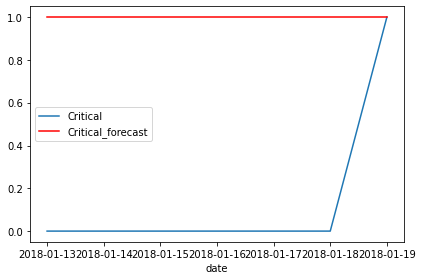

In [ ]:
ax = plt.gca()
lag_1 = compare_output_7.reset_index()
lag_1.plot(kind='line',x='date',y='Critical',ax=ax)
lag_1.plot(kind='line',x='date',y='Critical_forecast', color='red', ax=ax)

plt.tight_layout();

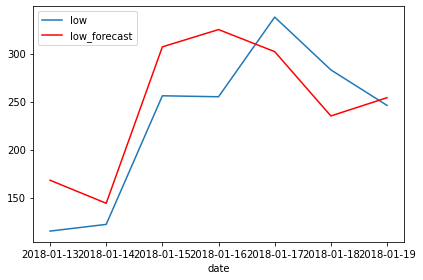

In [ ]:
ax = plt.gca()
lag_1 = compare_output_7.reset_index()
lag_1.plot(kind='line',x='date',y='low',ax=ax)
lag_1.plot(kind='line',x='date',y='low_forecast', color='red', ax=ax)

plt.tight_layout();

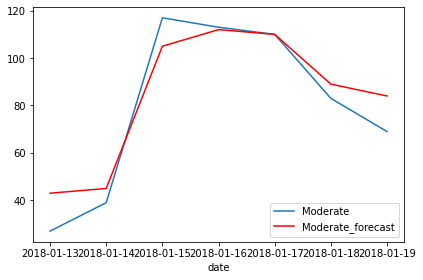

In [ ]:
ax = plt.gca()
lag_1 = compare_output_7.reset_index()
lag_1.plot(kind='line',x='date',y='Moderate',ax=ax)
lag_1.plot(kind='line',x='date',y='Moderate_forecast', color='red', ax=ax)

plt.tight_layout();

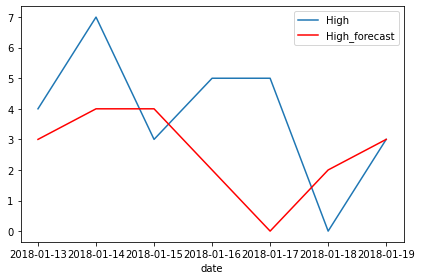

In [ ]:
ax = plt.gca()
lag_1 = compare_output_7.reset_index()
lag_1.plot(kind='line',x='date',y='High',ax=ax)
lag_1.plot(kind='line',x='date',y='High_forecast', color='red', ax=ax)

plt.tight_layout();

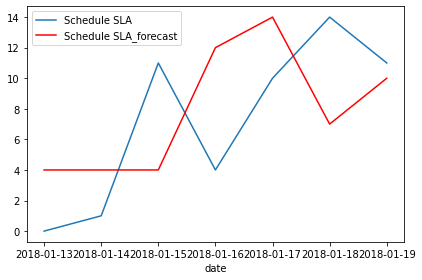

In [ ]:
ax = plt.gca()
lag_1 = compare_output_7.reset_index()
lag_1.plot(kind='line',x='date',y='Schedule SLA',ax=ax)
lag_1.plot(kind='line',x='date',y='Schedule SLA_forecast', color='red', ax=ax)

plt.tight_layout();

**Forecasting the number of tickets for next 7 days**

In [ ]:
final_df_copy = final_df.sort_index()
final_df_copy.head(10)

,Critical,High,low,Moderate,Schedule SLA
date,,,,,
2018-01-13,0.0,4.0,115.0,27.0,0.0
2018-01-14,0.0,7.0,122.0,39.0,1.0
2018-01-15,0.0,3.0,256.0,117.0,11.0
2018-01-16,0.0,5.0,255.0,113.0,4.0
2018-01-17,0.0,5.0,338.0,110.0,10.0
2018-01-18,0.0,0.0,283.0,83.0,14.0
2018-01-19,1.0,3.0,246.0,69.0,11.0
2018-01-20,1.0,3.0,186.0,30.0,3.0
2018-01-21,1.0,4.0,86.0,39.0,1.0


In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

In [ ]:
grangers_causation_matrix(final_df_copy, variables = final_df_copy.columns) 

,Critical_x,High_x,low_x,Moderate_x,Schedule SLA_x
Critical_y,1.0000,0.0125,0.0051,0.0012,0.0043
High_y,0.0533,1.0000,0.0000,0.0000,0.0000
low_y,0.0111,0.0000,1.0000,0.0000,0.0000
Moderate_y,0.3991,0.0000,0.0000,1.0000,0.0000
Schedule SLA_y,0.1278,0.0000,0.0000,0.0000,1.0000


In [ ]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(final_df_copy)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
Critical ::  206.67    > 60.0627   =>   True
High   ::  108.23    > 40.1749   =>   True
low    ::  53.98     > 24.2761   =>   True
Moderate ::  18.06     > 12.3212   =>   True
Schedule SLA ::  1.0       > 4.1296    =>   False


In [ ]:
#Check for Stationarity and Make the Time Series Stationary
#Since the VAR model requires the time series you want to forecast to be stationary, it is customary to check all the time series in the system for stationarity.

#Just to refresh, a stationary time series is one whose characteristics like mean and variance does not change over time.

def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")

In [ ]:
for name, column in final_df_copy.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Critical" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -19.0436
 No. Lags Chosen       = 0
 Critical value 1%     = -3.451
 Critical value 5%     = -2.871
 Critical value 10%    = -2.572
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "High" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -3.5385
 No. Lags Chosen       = 8
 Critical value 1%     = -3.452
 Critical value 5%     = -2.871
 Critical value 10%    = -2.572
 => P-Value = 0.0071. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "low" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    

In [ ]:
# 1st difference
df_differenced = final_df_copy.diff().dropna()

In [ ]:
# ADF Test on each column of 1st Differences Dataframe
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Critical" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -8.4862
 No. Lags Chosen       = 14
 Critical value 1%     = -3.452
 Critical value 5%     = -2.871
 Critical value 10%    = -2.572
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "High" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -8.8191
 No. Lags Chosen       = 12
 Critical value 1%     = -3.452
 Critical value 5%     = -2.871
 Critical value 10%    = -2.572
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "low" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 

In [ ]:
model = VAR(df_differenced)
for i in [1,2,3,4,5,6,7,8,9]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  21.18177082248666
BIC :  21.53750285156022
FPE :  1581743299.3462822
HQIC:  21.32386800714375 

Lag Order = 2
AIC :  20.559587900761027
BIC :  21.213277210087863
FPE :  849134884.6466904
HQIC:  20.82073277499172 

Lag Order = 3
AIC :  20.231220744029507
BIC :  21.184255065001096
FPE :  611642332.7508798
HQIC:  20.61199390984373 

Lag Order = 4
AIC :  19.919858942671986
BIC :  21.173636851972518
FPE :  448248689.92193115
HQIC:  20.42084556410313 

Lag Order = 5
AIC :  19.506343586663252
BIC :  21.062274624267786
FPE :  296708910.92157966
HQIC:  20.128133438817805 

Lag Order = 6
AIC :  18.992528097274104
BIC :  20.85203288608971
FPE :  177737311.98200697
HQIC:  19.735715616047866 

Lag Order = 7
AIC :  18.859147042828575
BIC :  21.023657410006265
FPE :  155842927.68060392
HQIC:  19.72433137530032 

Lag Order = 8
AIC :  18.86385478482389
BIC :  21.334813884769805
FPE :  156983044.23587787
HQIC:  19.85163984033762 

Lag Order = 9
AIC :  18.93636932061246
BIC :  21.715

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [ ]:
#Train the VAR Model of Selected Order(p=7)

model_fitted_var = model.fit(7)
model_fitted_var.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 09, Mar, 2021
Time:                     07:24:27
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                    21.0237
Nobs:                     311.000    HQIC:                   19.7243
Log likelihood:          -4959.05    FPE:                1.55843e+08
AIC:                      18.8591    Det(Omega_mle):     9.01243e+07
--------------------------------------------------------------------
Results for equation Critical
                     coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------
const                  -0.003862         0.026968           -0.143           0.886
L1.Critical            -0.949373         0.060500          -15.692           0.000
L1.High                 0.004525         0.009086

In [ ]:
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted_var.resid)

for col, val in zip(final_df_copy.columns, out):
    print((col), ':', round(val, 2))

Critical : 2.01
High : 2.06
low : 2.06
Moderate : 2.07
Schedule SLA : 2.04


In [ ]:
# Get the lag order
lag_order = model_fitted_var.k_ar
print(lag_order)  # 7

# Input data for forecasting
forecast_input_1 = df_differenced.values[-lag_order:]
forecast_input_1

7


array([[   0.,   -6.,  -31.,  -11.,  -19.],
       [   0.,    3., -135.,  -55.,   -5.],
       [   0.,    2.,  137.,   63.,    4.],
       [   0.,   -2.,  -73.,  -48.,   -5.],
       [   0.,    1., -114.,  -22.,   -1.],
       [   0.,   -5.,   -2.,   -6.,    0.],
       [   0.,    0.,   -1.,    1.,    0.]])

In [ ]:
from pandas.tseries.offsets import DateOffset
future_dates=[final_df_copy.index[-1]+ DateOffset(days=x)for x in range(0,8)]

NameError: ignored

In [ ]:
# Let Forecast
print('*********forecast at lag 7*************')
fc_var = model_fitted_var.forecast(y=forecast_input_1, steps=nobs)
df_forecast_var = pd.DataFrame(fc_var,index=future_dates[1:], columns=final_df_copy.columns + '_1d')
print(df_forecast_var)

*********forecast at lag 7*************
            Critical_1d   High_1d      low_1d  Moderate_1d  Schedule SLA_1d
2018-11-29    -0.028297  2.951550   62.367056    12.338334         1.774094
2018-11-30    -0.059157  1.477447  -51.156532   -19.356412        -3.586661
2018-12-01     0.109174 -1.585122  105.568283    47.486559         6.863094
2018-12-02    -0.135909  0.210426  -54.165835   -28.440754        -2.396148
2018-12-03    -0.117382  0.536573  -82.466936   -28.614637        -0.835129
2018-12-04     0.160487 -0.952790   17.177639     3.150482        -5.314238
2018-12-05    -0.070449 -0.291012   23.642516    14.114442         4.131463


In [ ]:
def invert_transformation(final_df_copy, df_forecast_var, first_diff=True):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast_var.copy()
    columns = final_df_copy.columns
    for col in columns:
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = final_df_copy[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

In [ ]:
df_results = invert_transformation(final_df_copy, df_forecast_var, first_diff=True)        
result = df_results.loc[:,['Critical_forecast','High_forecast','low_forecast','Moderate_forecast','Schedule SLA_forecast']]

In [ ]:
result

,Critical_forecast,High_forecast,low_forecast,Moderate_forecast,Schedule SLA_forecast
2018-11-29,-0.028297,2.951550,62.367056,13.338334,1.774094
2018-11-30,-0.087454,4.428997,11.210524,-6.018077,-1.812567
2018-12-01,0.021720,2.843875,116.778807,41.468482,5.050527
2018-12-02,-0.114189,3.054301,62.612972,13.027728,2.654379
2018-12-03,-0.231572,3.590874,-19.853964,-15.586909,1.819251
2018-12-04,-0.071085,2.638084,-2.676325,-12.436427,-3.494988
2018-12-05,-0.141534,2.347072,20.966191,1.678015,0.636475


In [ ]:
forecast_result = result.apply(np.ceil).abs().astype(int)
forecast_result

,Critical_forecast,High_forecast,low_forecast,Moderate_forecast,Schedule SLA_forecast
2018-11-29,0,3,63,14,2
2018-11-30,0,5,12,6,1
2018-12-01,1,3,117,42,6
2018-12-02,0,4,63,14,3
2018-12-03,0,4,19,15,2
2018-12-04,0,3,2,12,3
2018-12-05,0,3,21,2,1


In [ ]:
final_df_copy.tail(7)

,Critical,High,low,Moderate,Schedule SLA
date,,,,,
2018-11-21,0.0,1.0,188.0,68.0,7.0
2018-11-22,0.0,4.0,53.0,13.0,2.0
2018-11-23,0.0,6.0,190.0,76.0,6.0
2018-11-24,0.0,4.0,117.0,28.0,1.0
2018-11-25,0.0,5.0,3.0,6.0,0.0
2018-11-27,0.0,0.0,1.0,0.0,0.0
2018-11-28,0.0,0.0,0.0,1.0,0.0


numpy.ndarray

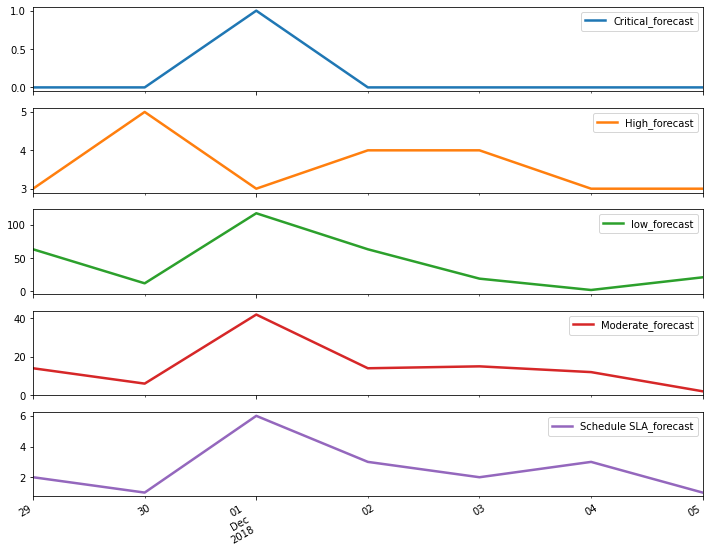

In [ ]:
axes = forecast_result.plot.line(figsize=(12, 10), linewidth=2.5,subplots=True)
type(axes)

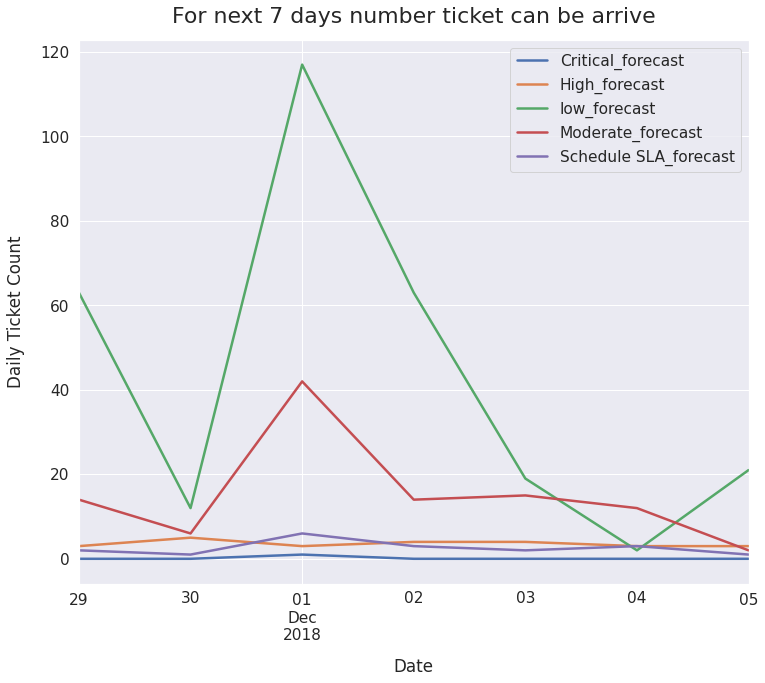

In [ ]:
import seaborn as sns
sns.set(font_scale=1.4)
forecast_result.plot(figsize=(12, 10), linewidth=2.5)
plt.xlabel("Date", labelpad=15)
plt.ylabel("Daily Ticket Count", labelpad=15)
plt.title("For next 7 days number ticket can be arrive", y=1.02, fontsize=22);

In [ ]:
from pandas.tseries.offsets import DateOffset
def var_model():
  model_fitted_var = model.fit(7)
  lag_order = model_fitted_var.k_ar
  forecast_input_1 = df_differenced.values[-lag_order:]
  
  fc_var = model_fitted_var.forecast(y=forecast_input_1, steps=7)
  return fc_var


In [ ]:
future_dates=[final_df_copy.index[-1]+ DateOffset(days=x) for x in range(0,8)]
df_forecast_var = pd.DataFrame(var_model(),index=future_dates[1:], columns=final_df_copy.columns + '_1d')

In [ ]:
def invert_transformation(final_df_copy, df_forecast_var, first_diff=True):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast_var.copy()
    columns = final_df_copy.columns
    for col in columns:
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = final_df_copy[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

In [ ]:
df_results = invert_transformation(final_df_copy, df_forecast_var, first_diff=True)        
result = df_results.loc[:,['Critical_forecast','High_forecast','low_forecast','Moderate_forecast','Schedule SLA_forecast']].apply(np.ceil).abs().astype(int)

In [ ]:
result

,Critical_forecast,High_forecast,low_forecast,Moderate_forecast,Schedule SLA_forecast
2018-11-29,0,3,63,14,2
2018-11-30,0,5,12,6,1
2018-12-01,1,3,117,42,6
2018-12-02,0,4,63,14,3
2018-12-03,0,4,19,15,2
2018-12-04,0,3,2,12,3
2018-12-05,0,3,21,2,1


In [ ]:
final_df_copy.to_csv(('priority.csv'),index=False)

In [ ]:
from google.colab import files
final_df_copy.to_csv('priority.csv')

# or any other file as usual
# with open('example.csv', 'w') as f:
#   f.write('your strings here')

files.download('priority.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>